In [5]:
import processing
import ds
import ml
import model_saving
import TS

/home/octo/anaconda2/envs/carnd-term1/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using TensorFlow backend.


In [6]:
import os
import sys

In [7]:
p = print
p('Machine: {} {}\n'.format(os.uname().sysname,os.uname().machine))
p(sys.version)

Machine: Linux x86_64

3.5.2 | packaged by conda-forge | (default, Jul 26 2016, 01:32:08) 
[GCC 4.8.2 20140120 (Red Hat 4.8.2-15)]


In [8]:
filename = '/home/octo/Dropbox'+ '/SPY29Dec.csv'

In [9]:
import numpy as np

In [10]:
data=processing.get_csv_pd(filename)
data=processing.BA(data)
data=processing.preprocessing(data)
data_km=ml.kalman_ma(data)
data['km']=data_km
data['diff']=np.where(np.logical_and(data.Open>data.km,data.spread>0),data.vwap-data.km,np.where(np.logical_and(data.Open<data.km,data.spread<0),data.vwap-data.km,0))

In [13]:
import pandas as pd
import talib

In [14]:
output = talib.SMA(np.array(data.Close.astype('float64')))

In [15]:
data['sma']=output

In [16]:
data.dropna().head()

,askPrice,askSize,bidPrice,bidSize,Open,Close,High,Low,...,change,liq,spread,vel,return,km,diff,sma
2017-12-29 21:15:08.202558,267.81000,15.00000,267.79999,243.00000,267.80499,267.80499,267.81000,267.79999,...,0.00000,0.01001,0.00443,0.00000,0.00004,267.62698,0.17359,267.81133
2017-12-29 21:15:08.211542,267.81000,6.00000,267.79999,243.00000,267.80499,267.80499,267.81000,267.79999,...,0.00000,0.01001,0.00476,0.00000,0.00004,267.64397,0.15626,267.81100
2017-12-29 21:15:09.232635,267.81000,6.00000,267.79999,231.00000,267.80499,267.80499,267.81000,267.79999,...,0.00000,0.01001,0.00476,0.00000,0.00004,267.65933,0.14090,267.81066
2017-12-29 21:15:09.242074,267.81000,5.00000,267.79999,231.00000,267.80499,267.80499,267.81000,267.79999,...,0.00000,0.01001,0.00479,0.00000,0.00004,267.67322,0.12698,267.81033
2017-12-29 21:15:09.584053,267.81000,5.00000,267.79999,245.00000,267.80499,267.80499,267.81000,267.79999,...,0.00000,0.01001,0.00479,0.00000,0.00004,267.68578,0.11442,267.81000


In [24]:
import numpy  
import pandas as pd  
import math as m

#Moving Average  
def MA(df, n):  
    MA = pd.Series(pd.rolling_mean(df['Close'], n), name = 'MA_' + str(n))  
    df = df.join(MA)  
    return df

#Exponential Moving Average  
def EMA(df, n):  
    EMA = pd.Series(pd.ewma(df['Close'], span = n, min_periods = n - 1), name = 'EMA_' + str(n))  
    df = df.join(EMA)  
    return df

#Momentum  
def MOM(df, n):  
    M = pd.Series(df['Close'].diff(n), name = 'Momentum_' + str(n))  
    df = df.join(M)  
    return df

#Rate of Change  
def ROC(df, n):  
    M = df['Close'].diff(n - 1)  
    N = df['Close'].shift(n - 1)  
    ROC = pd.Series(M / N, name = 'ROC_' + str(n))  
    df = df.join(ROC)  
    return df

#Average True Range  
def ATR(df, n):  
    i = 0  
    TR_l = [0]  
    while i < df.index[-1]:  
        TR = max(df.get_value(i + 1, 'High'), df.get_value(i, 'Close')) - min(df.get_value(i + 1, 'Low'), df.get_value(i, 'Close'))  
        TR_l.append(TR)  
        i = i + 1  
    TR_s = pd.Series(TR_l)  
    ATR = pd.Series(pd.ewma(TR_s, span = n, min_periods = n), name = 'ATR_' + str(n))  
    df = df.join(ATR)  
    return df

#Bollinger Bands  
def BBANDS(df, n):  
    MA = pd.Series(pd.rolling_mean(df['Close'], n))  
    MSD = pd.Series(pd.rolling_std(df['Close'], n))  
    b1 = 4 * MSD / MA  
    B1 = pd.Series(b1, name = 'BollingerB_' + str(n))  
    df = df.join(B1)  
    b2 = (df['Close'] - MA + 2 * MSD) / (4 * MSD)  
    B2 = pd.Series(b2, name = 'Bollinger%b_' + str(n))  
    df = df.join(B2)  
    return df

#Pivot Points, Supports and Resistances  
def PPSR(df):  
    PP = pd.Series((df['High'] + df['Low'] + df['Close']) / 3)  
    R1 = pd.Series(2 * PP - df['Low'])  
    S1 = pd.Series(2 * PP - df['High'])  
    R2 = pd.Series(PP + df['High'] - df['Low'])  
    S2 = pd.Series(PP - df['High'] + df['Low'])  
    R3 = pd.Series(df['High'] + 2 * (PP - df['Low']))  
    S3 = pd.Series(df['Low'] - 2 * (df['High'] - PP))  
    psr = {'PP':PP, 'R1':R1, 'S1':S1, 'R2':R2, 'S2':S2, 'R3':R3, 'S3':S3}  
    PSR = pd.DataFrame(psr)  
    df = df.join(PSR)  
    return df

#Stochastic oscillator %K  
def STOK(df):  
    SOk = pd.Series((df['Close'] - df['Low']) / (df['High'] - df['Low']), name = 'SO%k')  
    df = df.join(SOk)  
    return df

#Stochastic oscillator %D  
def STO(df, n):  
    SOk = pd.Series((df['Close'] - df['Low']) / (df['High'] - df['Low']), name = 'SO%k')  
    SOd = pd.Series(pd.ewma(SOk, span = n, min_periods = n - 1), name = 'SO%d_' + str(n))  
    df = df.join(SOd)  
    return df

#Trix  
def TRIX(df, n):  
    EX1 = pd.ewma(df['Close'], span = n, min_periods = n - 1)  
    EX2 = pd.ewma(EX1, span = n, min_periods = n - 1)  
    EX3 = pd.ewma(EX2, span = n, min_periods = n - 1)  
    i = 0  
    ROC_l = [0]  
    while i + 1 <= df.index[-1]:  
        ROC = (EX3[i + 1] - EX3[i]) / EX3[i]  
        ROC_l.append(ROC)  
        i = i + 1  
    Trix = pd.Series(ROC_l, name = 'Trix_' + str(n))  
    df = df.join(Trix)  
    return df

#Average Directional Movement Index  
def ADX(df, n, n_ADX):  
    i = 0  
    UpI = []  
    DoI = []  
    while i + 1 <= df.index[-1]:  
        UpMove = df.get_value(i + 1, 'High') - df.get_value(i, 'High')  
        DoMove = df.get_value(i, 'Low') - df.get_value(i + 1, 'Low')  
        if UpMove > DoMove and UpMove > 0:  
            UpD = UpMove  
        else: UpD = 0  
        UpI.append(UpD)  
        if DoMove > UpMove and DoMove > 0:  
            DoD = DoMove  
        else: DoD = 0  
        DoI.append(DoD)  
        i = i + 1  
    i = 0  
    TR_l = [0]  
    while i < df.index[-1]:  
        TR = max(df.get_value(i + 1, 'High'), df.get_value(i, 'Close')) - min(df.get_value(i + 1, 'Low'), df.get_value(i, 'Close'))  
        TR_l.append(TR)  
        i = i + 1  
    TR_s = pd.Series(TR_l)  
    ATR = pd.Series(pd.ewma(TR_s, span = n, min_periods = n))  
    UpI = pd.Series(UpI)  
    DoI = pd.Series(DoI)  
    PosDI = pd.Series(pd.ewma(UpI, span = n, min_periods = n - 1) / ATR)  
    NegDI = pd.Series(pd.ewma(DoI, span = n, min_periods = n - 1) / ATR)  
    ADX = pd.Series(pd.ewma(abs(PosDI - NegDI) / (PosDI + NegDI), span = n_ADX, min_periods = n_ADX - 1), name = 'ADX_' + str(n) + '_' + str(n_ADX))  
    df = df.join(ADX)  
    return df

#MACD, MACD Signal and MACD difference  
def MACD(df, n_fast, n_slow):  
    EMAfast = pd.Series(pd.ewma(df['Close'], span = n_fast, min_periods = n_slow - 1))  
    EMAslow = pd.Series(pd.ewma(df['Close'], span = n_slow, min_periods = n_slow - 1))  
    MACD = pd.Series(EMAfast - EMAslow, name = 'MACD_' + str(n_fast) + '_' + str(n_slow))  
    MACDsign = pd.Series(pd.ewma(MACD, span = 9, min_periods = 8), name = 'MACDsign_' + str(n_fast) + '_' + str(n_slow))  
    MACDdiff = pd.Series(MACD - MACDsign, name = 'MACDdiff_' + str(n_fast) + '_' + str(n_slow))  
    df = df.join(MACD)  
    df = df.join(MACDsign)  
    df = df.join(MACDdiff)  
    return df

#Mass Index  
def MassI(df):  
    Range = df['High'] - df['Low']  
    EX1 = pd.ewma(Range, span = 9, min_periods = 8)  
    EX2 = pd.ewma(EX1, span = 9, min_periods = 8)  
    Mass = EX1 / EX2  
    MassI = pd.Series(pd.rolling_sum(Mass, 25), name = 'Mass Index')  
    df = df.join(MassI)  
    return df

#Vortex Indicator: http://www.vortexindicator.com/VFX_VORTEX.PDF  
def Vortex(df, n):  
    i = 0  
    TR = [0]  
    while i < df.index[-1]:  
        Range = max(df.get_value(i + 1, 'High'), df.get_value(i, 'Close')) - min(df.get_value(i + 1, 'Low'), df.get_value(i, 'Close'))  
        TR.append(Range)  
        i = i + 1  
    i = 0  
    VM = [0]  
    while i < df.index[-1]:  
        Range = abs(df.get_value(i + 1, 'High') - df.get_value(i, 'Low')) - abs(df.get_value(i + 1, 'Low') - df.get_value(i, 'High'))  
        VM.append(Range)  
        i = i + 1  
    VI = pd.Series(pd.rolling_sum(pd.Series(VM), n) / pd.rolling_sum(pd.Series(TR), n), name = 'Vortex_' + str(n))  
    df = df.join(VI)  
    return df





#KST Oscillator  
def KST(df, r1, r2, r3, r4, n1, n2, n3, n4):  
    M = df['Close'].diff(r1 - 1)  
    N = df['Close'].shift(r1 - 1)  
    ROC1 = M / N  
    M = df['Close'].diff(r2 - 1)  
    N = df['Close'].shift(r2 - 1)  
    ROC2 = M / N  
    M = df['Close'].diff(r3 - 1)  
    N = df['Close'].shift(r3 - 1)  
    ROC3 = M / N  
    M = df['Close'].diff(r4 - 1)  
    N = df['Close'].shift(r4 - 1)  
    ROC4 = M / N  
    KST = pd.Series(pd.rolling_sum(ROC1, n1) + pd.rolling_sum(ROC2, n2) * 2 + pd.rolling_sum(ROC3, n3) * 3 + pd.rolling_sum(ROC4, n4) * 4, name = 'KST_' + str(r1) + '_' + str(r2) + '_' + str(r3) + '_' + str(r4) + '_' + str(n1) + '_' + str(n2) + '_' + str(n3) + '_' + str(n4))  
    df = df.join(KST)  
    return df

#Relative Strength Index  
def RSI(df, n):  
    i = 0  
    UpI = [0]  
    DoI = [0]  
    while i + 1 <= df.index[-1]:  
        UpMove = df.get_value(i + 1, 'High') - df.get_value(i, 'High')  
        DoMove = df.get_value(i, 'Low') - df.get_value(i + 1, 'Low')  
        if UpMove > DoMove and UpMove > 0:  
            UpD = UpMove  
        else: UpD = 0  
        UpI.append(UpD)  
        if DoMove > UpMove and DoMove > 0:  
            DoD = DoMove  
        else: DoD = 0  
        DoI.append(DoD)  
        i = i + 1  
    UpI = pd.Series(UpI)  
    DoI = pd.Series(DoI)  
    PosDI = pd.Series(pd.ewma(UpI, span = n, min_periods = n - 1))  
    NegDI = pd.Series(pd.ewma(DoI, span = n, min_periods = n - 1))  
    RSI = pd.Series(PosDI / (PosDI + NegDI), name = 'RSI_' + str(n))  
    df = df.join(RSI)  
    return df

#True Strength Index  
def TSI(df, r, s):  
    M = pd.Series(df['Close'].diff(1))  
    aM = abs(M)  
    EMA1 = pd.Series(pd.ewma(M, span = r, min_periods = r - 1))  
    aEMA1 = pd.Series(pd.ewma(aM, span = r, min_periods = r - 1))  
    EMA2 = pd.Series(pd.ewma(EMA1, span = s, min_periods = s - 1))  
    aEMA2 = pd.Series(pd.ewma(aEMA1, span = s, min_periods = s - 1))  
    TSI = pd.Series(EMA2 / aEMA2, name = 'TSI_' + str(r) + '_' + str(s))  
    df = df.join(TSI)  
    return df

#Accumulation/Distribution  
def ACCDIST(df, n):  
    ad = (2 * df['Close'] - df['High'] - df['Low']) / (df['High'] - df['Low']) * df['Volume']  
    M = ad.diff(n - 1)  
    N = ad.shift(n - 1)  
    ROC = M / N  
    AD = pd.Series(ROC, name = 'Acc/Dist_ROC_' + str(n))  
    df = df.join(AD)  
    return df

#Chaikin Oscillator  
def Chaikin(df):  
    ad = (2 * df['Close'] - df['High'] - df['Low']) / (df['High'] - df['Low']) * df['Volume']  
    Chaikin = pd.Series(pd.ewma(ad, span = 3, min_periods = 2) - pd.ewma(ad, span = 10, min_periods = 9), name = 'Chaikin')  
    df = df.join(Chaikin)  
    return df

#Money Flow Index and Ratio  
def MFI(df, n):  
    PP = (df['High'] + df['Low'] + df['Close']) / 3  
    i = 0  
    PosMF = [0]  
    while i < df.index[-1]:  
        if PP[i + 1] > PP[i]:  
            PosMF.append(PP[i + 1] * df.get_value(i + 1, 'Volume'))  
        else:  
            PosMF.append(0)  
        i = i + 1  
    PosMF = pd.Series(PosMF)  
    TotMF = PP * df['Volume']  
    MFR = pd.Series(PosMF / TotMF)  
    MFI = pd.Series(pd.rolling_mean(MFR, n), name = 'MFI_' + str(n))  
    df = df.join(MFI)  
    return df

#On-balance Volume  
def OBV(df, n):  
    i = 0  
    OBV = [0]  
    while i < df.index[-1]:  
        if df.get_value(i + 1, 'Close') - df.get_value(i, 'Close') > 0:  
            OBV.append(df.get_value(i + 1, 'Volume'))  
        if df.get_value(i + 1, 'Close') - df.get_value(i, 'Close') == 0:  
            OBV.append(0)  
        if df.get_value(i + 1, 'Close') - df.get_value(i, 'Close') < 0:  
            OBV.append(-df.get_value(i + 1, 'Volume'))  
        i = i + 1  
    OBV = pd.Series(OBV)  
    OBV_ma = pd.Series(pd.rolling_mean(OBV, n), name = 'OBV_' + str(n))  
    df = df.join(OBV_ma)  
    return df

#Force Index  
def FORCE(df, n):  
    F = pd.Series(df['Close'].diff(n) * df['Volume'].diff(n), name = 'Force_' + str(n))  
    df = df.join(F)  
    return df

#Ease of Movement  
def EOM(df, n):  
    EoM = (df['High'].diff(1) + df['Low'].diff(1)) * (df['High'] - df['Low']) / (2 * df['Volume'])  
    Eom_ma = pd.Series(pd.rolling_mean(EoM, n), name = 'EoM_' + str(n))  
    df = df.join(Eom_ma)  
    return df

#Commodity Channel Index  
def CCI(df, n):  
    PP = (df['High'] + df['Low'] + df['Close']) / 3  
    CCI = pd.Series((PP - pd.rolling_mean(PP, n)) / pd.rolling_std(PP, n), name = 'CCI_' + str(n))  
    df = df.join(CCI)  
    return df

#Coppock Curve  
def COPP(df, n):  
    M = df['Close'].diff(int(n * 11 / 10) - 1)  
    N = df['Close'].shift(int(n * 11 / 10) - 1)  
    ROC1 = M / N  
    M = df['Close'].diff(int(n * 14 / 10) - 1)  
    N = df['Close'].shift(int(n * 14 / 10) - 1)  
    ROC2 = M / N  
    Copp = pd.Series(pd.ewma(ROC1 + ROC2, span = n, min_periods = n), name = 'Copp_' + str(n))  
    df = df.join(Copp)  
    return df

#Keltner Channel  
def KELCH(df, n):  
    KelChM = pd.Series(pd.rolling_mean((df['High'] + df['Low'] + df['Close']) / 3, n), name = 'KelChM_' + str(n))  
    KelChU = pd.Series(pd.rolling_mean((4 * df['High'] - 2 * df['Low'] + df['Close']) / 3, n), name = 'KelChU_' + str(n))  
    KelChD = pd.Series(pd.rolling_mean((-2 * df['High'] + 4 * df['Low'] + df['Close']) / 3, n), name = 'KelChD_' + str(n))  
    df = df.join(KelChM)  
    df = df.join(KelChU)  
    df = df.join(KelChD)  
    return df

#Ultimate Oscillator  
def ULTOSC(df):  
    i = 0  
    TR_l = [0]  
    BP_l = [0]  
    while i < df.index[-1]:  
        TR = max(df.get_value(i + 1, 'High'), df.get_value(i, 'Close')) - min(df.get_value(i + 1, 'Low'), df.get_value(i, 'Close'))  
        TR_l.append(TR)  
        BP = df.get_value(i + 1, 'Close') - min(df.get_value(i + 1, 'Low'), df.get_value(i, 'Close'))  
        BP_l.append(BP)  
        i = i + 1  
    UltO = pd.Series((4 * pd.rolling_sum(pd.Series(BP_l), 7) / pd.rolling_sum(pd.Series(TR_l), 7)) + (2 * pd.rolling_sum(pd.Series(BP_l), 14) / pd.rolling_sum(pd.Series(TR_l), 14)) + (pd.rolling_sum(pd.Series(BP_l), 28) / pd.rolling_sum(pd.Series(TR_l), 28)), name = 'Ultimate_Osc')  
    df = df.join(UltO)  
    return df

#Donchian Channel  
def DONCH(df, n):  
    i = 0  
    DC_l = []  
    while i < n - 1:  
        DC_l.append(0)  
        i = i + 1  
    i = 0  
    while i + n - 1 < df.index[-1]:  
        DC = max(df['High'].ix[i:i + n - 1]) - min(df['Low'].ix[i:i + n - 1])  
        DC_l.append(DC)  
        i = i + 1  
    DonCh = pd.Series(DC_l, name = 'Donchian_' + str(n))  
    DonCh = DonCh.shift(n - 1)  
    df = df.join(DonCh)  
    return df

#Standard Deviation  
def STDDEV(df, n):  
    df = df.join(pd.Series(pd.rolling_std(df['Close'], n), name = 'STD_' + str(n)))  
    return df  

In [31]:
dataset = data.values

In [32]:
dataset

array([[ 267.82001,   54.     ,  267.81   , ...,  257.9075 ,    0.     ,
               nan],
       [ 267.82001,   54.     ,  267.81   , ...,  261.25374,    0.     ,
               nan],
       [ 267.82001,   49.     ,  267.81   , ...,  262.94669,    0.     ,
               nan],
       ..., 
       [ 266.     ,   55.     ,  265.98999, ...,  265.99696,    0.00221,
         265.99849],
       [ 266.     ,   55.     ,  265.98999, ...,  265.99678,    0.00304,
         265.99749],
       [ 266.     ,   50.     ,  265.98999, ...,  265.99661,    0.00321,
         265.99666]])

In [41]:
#Use the values attribute to return the values as a np array and then use [0] to get the first value:
variables=5
values = dataset [:, 0 : variables] .astype ( float )
result = dataset [:, variables]

In [44]:
data.head()

,askPrice,askSize,bidPrice,bidSize,Open,Close,High,Low,...,change,liq,spread,vel,return,km,diff,sma
2017-12-29 21:14:58.820995,267.82001,54.00000,267.81000,19.00000,267.81500,267.81500,267.82001,267.81000,...,0.00000,0.01001,-0.00238,0.01001,0.00004,257.90750,0.00000,nan
2017-12-29 21:15:00.302764,267.82001,54.00000,267.81000,23.00000,267.81500,267.81500,267.82001,267.81000,...,0.00000,0.01001,-0.00201,0.01001,0.00004,261.25374,0.00000,nan
2017-12-29 21:15:00.310661,267.82001,49.00000,267.81000,23.00000,267.81500,267.81500,267.82001,267.81000,...,0.00000,0.01001,-0.00180,0.01001,0.00004,262.94669,0.00000,nan
2017-12-29 21:15:00.323921,267.82001,49.00000,267.81000,28.00000,267.81500,267.81500,267.82001,267.81000,...,0.00000,0.01001,-0.00134,0.01001,0.00004,263.97571,0.00000,nan
2017-12-29 21:15:00.332070,267.82001,45.00000,267.81000,28.00000,267.81500,267.81500,267.82001,267.81000,...,0.00000,0.01001,-0.00116,0.01001,0.00004,264.67157,0.00000,nan


In [36]:
values[1:3]

array([[ 267.82001,   54.     ,  267.81   ,   23.     ,  267.815  ],
       [ 267.82001,   49.     ,  267.81   ,   23.     ,  267.815  ]])

In [43]:
values[0]

array([ 267.82001,   54.     ,  267.81   ,   19.     ,  267.815  ])

In [42]:
result

array([ 267.815,  267.815,  267.815, ...,  265.995,  265.995,  265.995])

https://www.quantinsti.com/blog/build-technical-indicators-in-python/

https://github.com/topics/technical-analysis

https://github.com/mrjbq7/ta-lib

https://www.quantinsti.com/blog/build-technical-indicators-in-python/

# CCI

In [12]:
data.mean()

askPrice   267.30978
askSize    123.56247
bidPrice   267.29812
bidSize    141.26391
Open       267.30395
Close      267.30398
High       267.31313
Low        267.29514
              ...   
vwap       267.30379
change      -0.00003
liq          0.01166
spread       0.00016
vel         -0.00165
return       0.00004
km         267.30343
diff        -0.00004
Length: 17, dtype: float64

In [17]:
# Commodity Channel Index Python Code

# Load the necessary packages and modules
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import fix_yahoo_finance
import pandas as pd

In [99]:
# Commodity Channel Index 
def CCI(data, ndays): 
 TP = (data['High'] + data['Low'] + data['Close']) / 3 
 CCI = pd.Series((TP - pd.rolling_mean(TP, ndays)) / (0.015 * pd.rolling_std(TP, ndays)),
 name = 'CCI') 
 data = data.join(CCI) 
 return data
# Ease of Movement 
def EVM(data, ndays): 
 dm = ((data['High'] + data['Low'])/2) - ((data['High'].shift(1) + data['Low'].shift(1))/2)
 br = (data['Volume'] / 100000000) / ((data['High'] - data['Low']))
 EVM = dm / br 
 EVM_MA = pd.Series(pd.rolling_mean(EVM, ndays), name = 'EVM') 
 data = data.join(EVM_MA) 
 return data 
# Simple Moving Average 
def SMA(data, ndays): 
 SMA = pd.Series(pd.rolling_mean(data['Close'], ndays), name = 'SMA') 
 data = data.join(SMA) 
 return data

# Exponentially-weighted Moving Average 
def EWMA(data, ndays): 
 EMA = pd.Series(pd.ewma(data['Close'], span = ndays, min_periods = ndays - 1), 
 name = 'EWMA_' + str(ndays)) 
 data = data.join(EMA) 
 return data

# Rate of Change (ROC)
def ROC(data,n):
 N = data['Close'].diff(n)
 D = data['Close'].shift(n)
 ROC = pd.Series(N/D,name='Rate of Change')
 data = data.join(ROC)
 return data 
# Compute the Bollinger Bands 
def BBANDS(data, window=n):
 MA = data.Close.rolling(window=n).mean()
 SD = data.Close.rolling(window=n).std()
 data['UpperBB'] = MA + (2 * SD) 
 data['LowerBB'] = MA - (2 * SD)
 return data
# Force Index 
def ForceIndex(data, ndays): 
 FI = pd.Series(data['Close'].diff(ndays) * data['Volume'], name = 'ForceIndex') 
 data = data.join(FI) 
 return data

In [21]:
data.High.head()

2017-12-29 21:14:58.820995   267.82001
2017-12-29 21:15:00.302764   267.82001
2017-12-29 21:15:00.310661   267.82001
2017-12-29 21:15:00.323921   267.82001
2017-12-29 21:15:00.332070   267.82001
Name: High, dtype: float64

In [38]:
# Compute the Commodity Channel Index(CCI) for NIFTY based on the 20-day Moving average
n = 20
SPY_CCI = CCI(data,n)
CCI = SPY_CCI['CCI']

In [25]:
CCI.dropna().head()

2017-12-29 21:15:06.101996   -174.25288
2017-12-29 21:15:06.112265   -178.02832
2017-12-29 21:15:06.122153   -144.87282
2017-12-29 21:15:06.132172   -123.28828
2017-12-29 21:15:06.142786   -107.58347
Name: CCI, dtype: float64

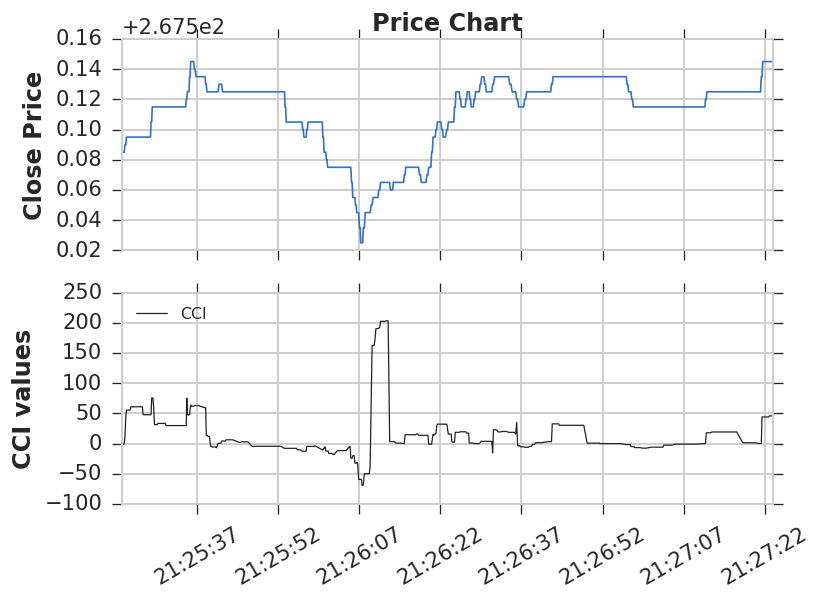

In [54]:
# Plotting the Price Series chart and the Commodity Channel index below
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(2, 1, 1)
ax.set_xticklabels([])
plt.plot(data['Close'][2000:2500],lw=1)
plt.title('Price Chart')
plt.ylabel('Close Price')
plt.grid(True)
bx = fig.add_subplot(2, 1, 2)
plt.plot(CCI[2000:2500],'k',lw=0.75,linestyle='-',label='CCI')
plt.legend(loc=2,prop={'size':9.5})
plt.ylabel('CCI values')
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
plt.show()

In [42]:
# Compute the Commodity Channel Index(CCI) for NIFTY based on the 20-day Moving average
n = 20
SPY_EVM = EVM(data,n)
EVM = SPY_EVM['EVM']

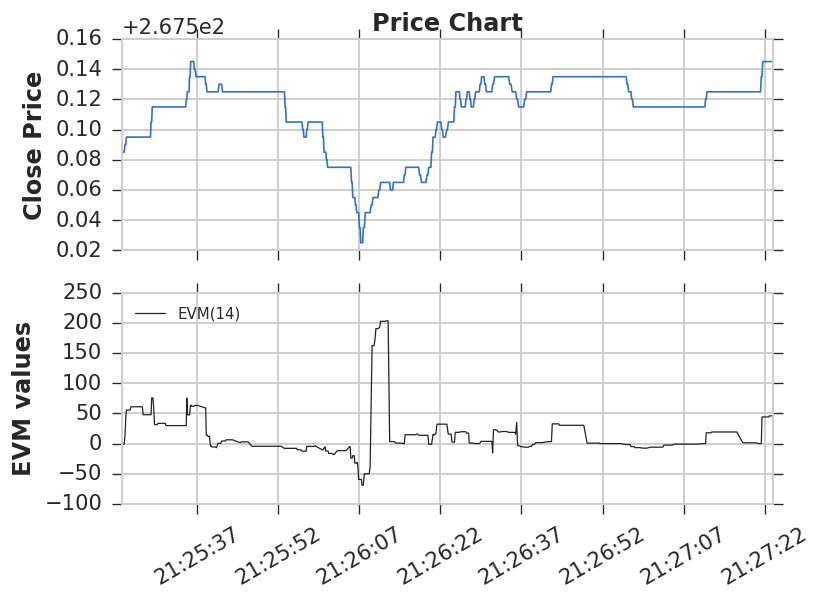

In [53]:
# Plotting the Price Series chart and the Ease Of Movement below
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(2, 1, 1)
ax.set_xticklabels([])
plt.plot(data['Close'][2000:2500],lw=1)
plt.title('Price Chart')
plt.ylabel('Close Price')
plt.grid(True)
bx = fig.add_subplot(2, 1, 2)
plt.plot(EVM[2000:2500],'k',lw=0.75,linestyle='-',label='EVM(14)')
plt.legend(loc=2,prop={'size':9})
plt.ylabel('EVM values')
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
plt.show()

In [101]:
# Compute the 50-day SMA for NIFTY
n = 50
SMA_SPY = SMA(data,n)
SMA_SPY = SMA_SPY.dropna()
SMA = SMA_SPY['SMA']

# Compute the 200-day EWMA for NIFTY
ew = 200
EWMA_SPY = EWMA(data,ew)
EWMA_SPY = EWMA_SPY.dropna()
EWMA = EWMA_SPY['EWMA_200']

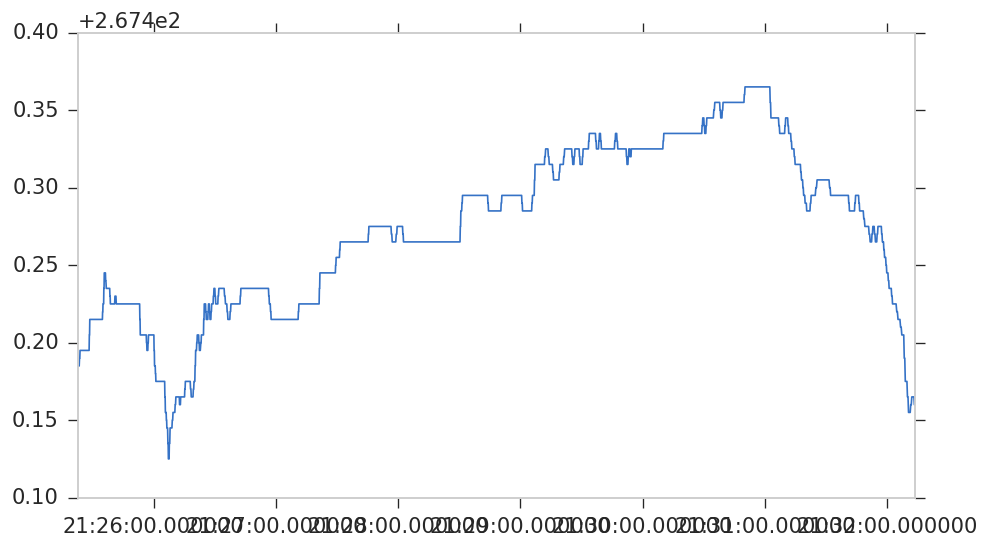

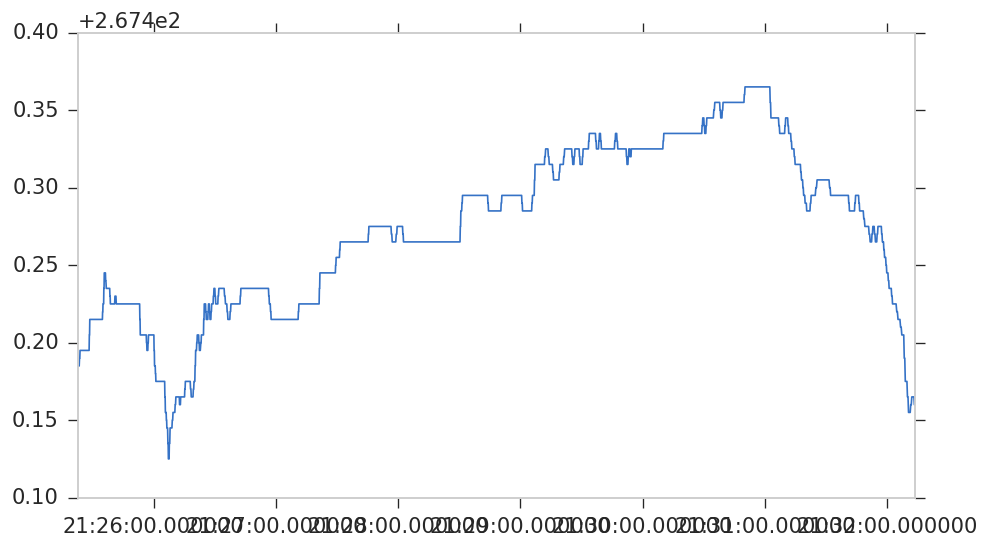

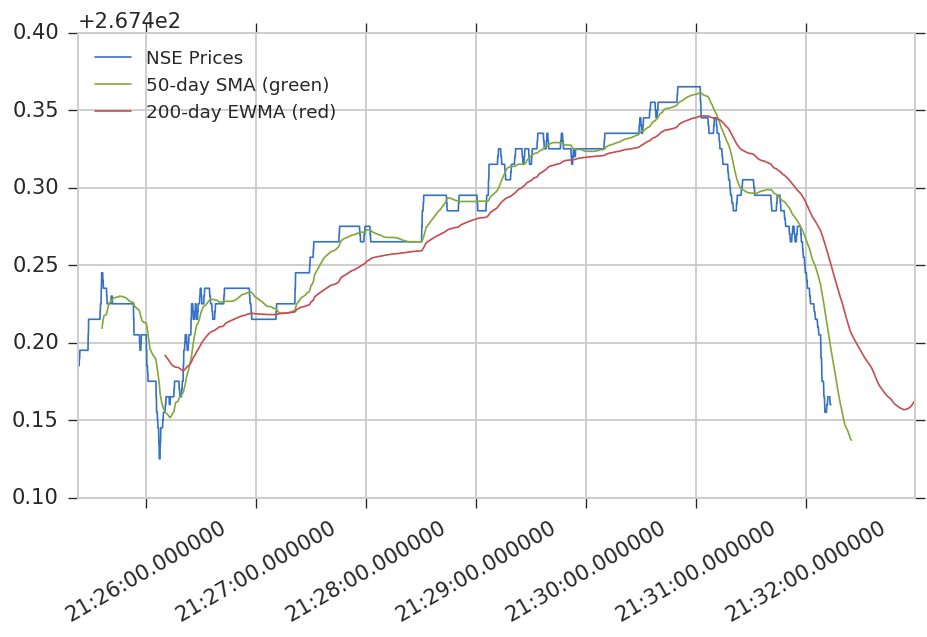

In [102]:
# Plotting the NIFTY Price Series chart and Moving Averages below
plt.figure(figsize=(9,5))
plt.plot(data['Close'][2000:3500],lw=1, label='NSE Prices')
plt.plot(SMA[2000:3500],'g',lw=1, label='50-day SMA (green)')
plt.plot(EWMA[2000:3500],'r', lw=1, label='200-day EWMA (red)')
plt.legend(loc=2,prop={'size':11})
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
plt.show()

In [84]:
# Compute the 5-period Rate of Change for NIFTY
n = 12
SPY_ROC = ROC(data,n)
ROC = SPY_ROC['Rate of Change']

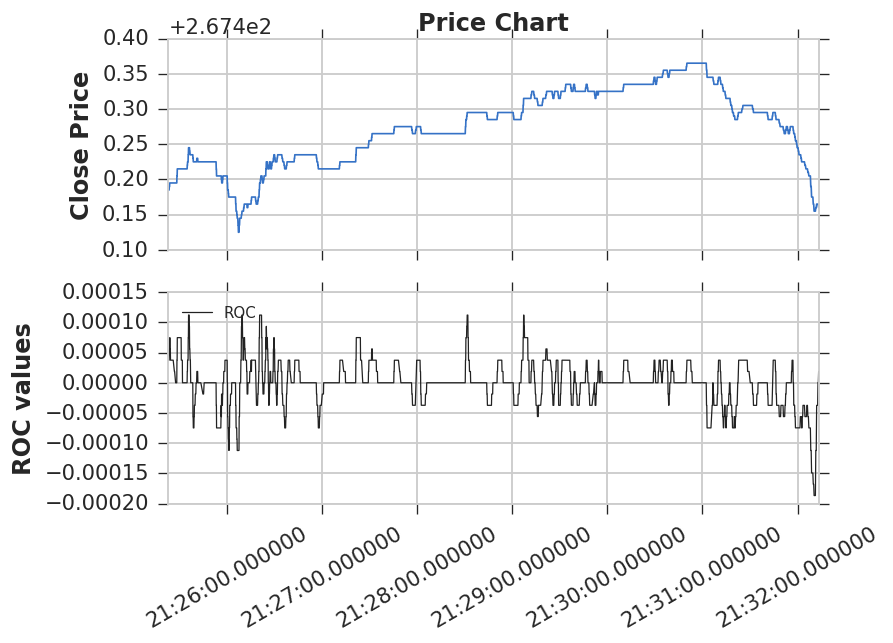

In [85]:
# Plotting the Price Series chart and the Ease Of Movement below
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(2, 1, 1)
ax.set_xticklabels([])
plt.plot(data['Close'][2000:3500],lw=1)
plt.title('Price Chart')
plt.ylabel('Close Price')
plt.grid(True)
bx = fig.add_subplot(2, 1, 2)
plt.plot(ROC[2000:3500],'k',lw=0.75,linestyle='-',label='ROC')
plt.legend(loc=2,prop={'size':9})
plt.ylabel('ROC values')
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
plt.show()

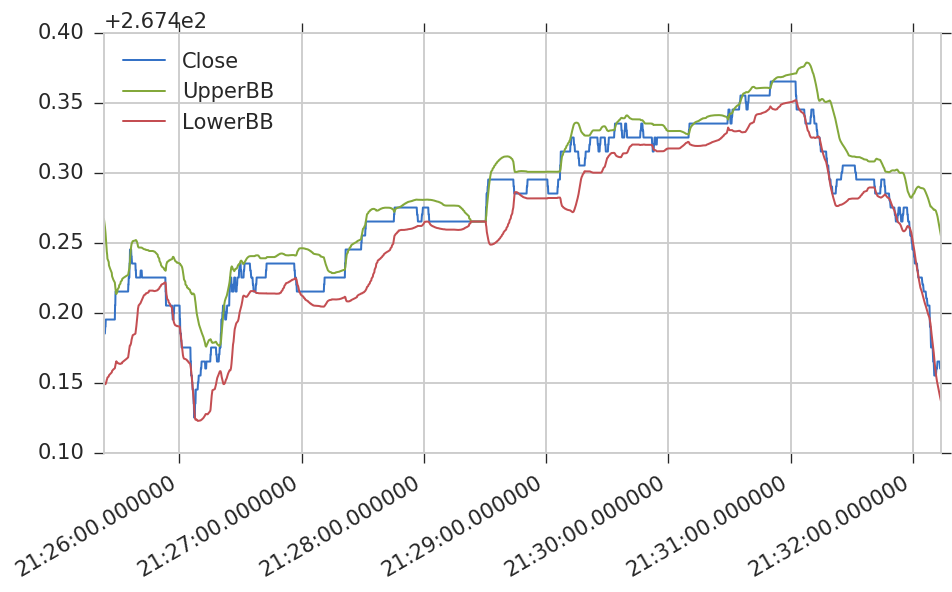

In [90]:
# Compute the Bollinger Bands for NIFTY using the 50-day Moving average
n = 50
SPY_BBANDS = BBANDS(data, n)
#print(SPY_BBANDS)

# Create the plot
pd.concat([SPY_BBANDS.Close,SPY_BBANDS.UpperBB,SPY_BBANDS.LowerBB],axis=1)[2000:3500].plot(figsize=(9,5),grid=True)
plt.show()

In [95]:
# Compute the Force Index for AAPL
n = 1
SPY_ForceIndex = ForceIndex(data,n)
ForceIndex = SPY_ForceIndex['ForceIndex']

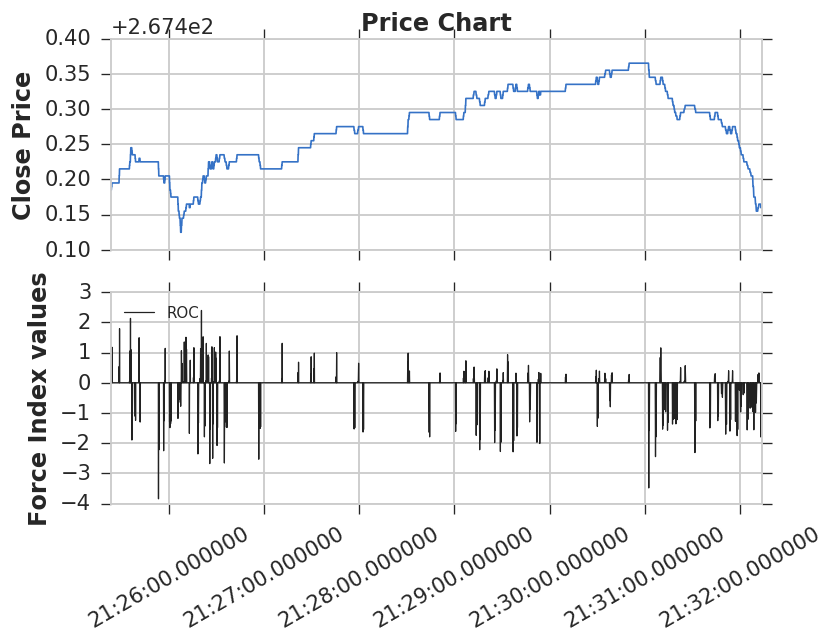

In [97]:
# Plotting the Price Series chart and the Ease Of Movement below
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(2, 1, 1)
ax.set_xticklabels([])
plt.plot(data['Close'][2000:3500],lw=1)
plt.title('Price Chart')
plt.ylabel('Close Price')
plt.grid(True)
bx = fig.add_subplot(2, 1, 2)
plt.plot(ForceIndex[2000:3500],'k',lw=0.75,linestyle='-',label='ROC')
plt.legend(loc=2,prop={'size':9})
plt.ylabel('Force Index values')
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
plt.show()

https://www.quantinsti.com/blog/strategy-using-trend-following-indicators-macd-st-adx/